In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
data_dir = "C:\\Users\\Welcome\\Desktop\\ml\\Tensorflow\\Leaf-Classification\\Code\\plantvillage dataset\\color"
data_dir = pathlib.Path(data_dir)
print(data_dir)

C:\Users\Welcome\Desktop\ml\Tensorflow\Leaf-Classification\Code\plantvillage dataset\color


In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

54303


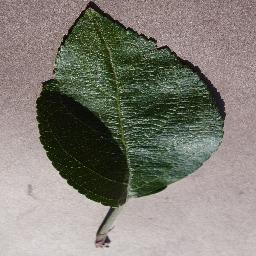

In [7]:
apple_leaves_healthy = list(data_dir.glob('Apple___healthy/*'))
PIL.Image.open(str(apple_leaves_healthy[0]))

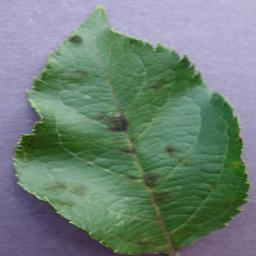

In [8]:
apple_leaves_scab = list(data_dir.glob('Apple___Apple_scab/*'))
PIL.Image.open(str(apple_leaves_scab[0]))

In [9]:
batch_size = 32
img_h = 180
img_w = 180

In [10]:
train_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    batch_size=batch_size,
    subset='training',
    image_size=(img_h, img_w),
    seed=123
)

Found 54305 files belonging to 38 classes.
Using 38014 files for training.


In [1]:
val_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    batch_size=batch_size,
    subset='validation',
    image_size=(img_h, img_w),
    seed=123
)

NameError: name 'keras' is not defined

In [12]:
class_names = train_ds.class_names
print(class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

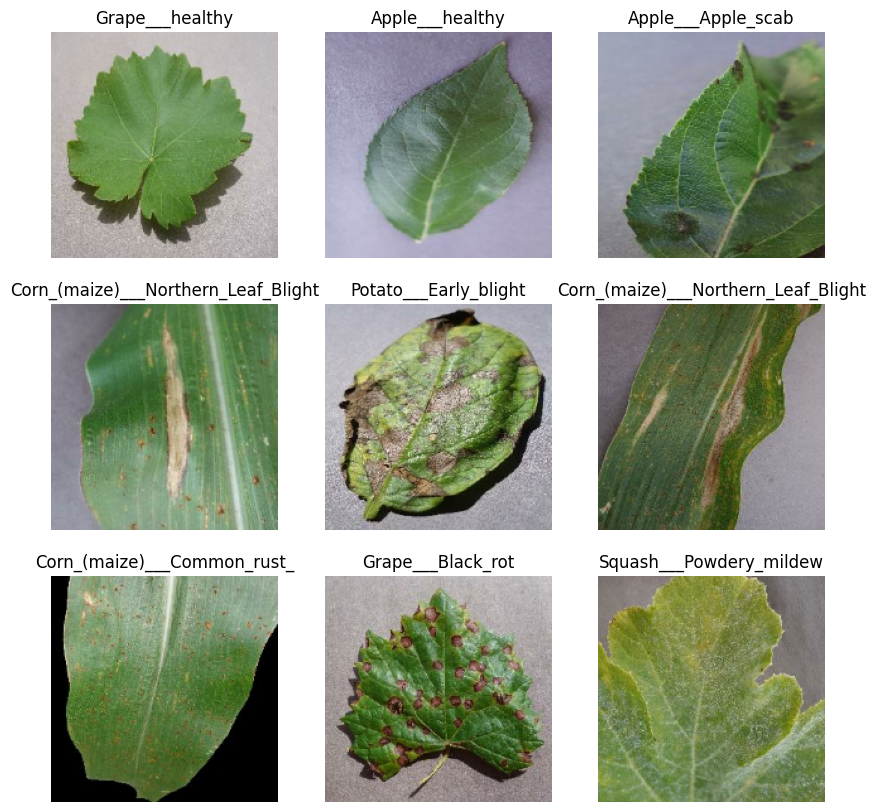

In [13]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [14]:
for images_batch, labels_batch in train_ds:
    print(images_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)

In [16]:
total_classes = len(class_names)
print(total_classes)

38


In [17]:
train_ds = train_ds.map(lambda x, y: (x, tf.one_hot(y, total_classes)))
val_ds = val_ds.map(lambda x, y: (x, tf.one_hot(y, total_classes)))

In [18]:
normalization_layer = layers.Rescaling(scale=1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

In [17]:
model = Sequential(
    [
        layers.Rescaling(scale=1./255, input_shape=(img_h, img_w, 3)),
        layers.Conv2D(16, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(total_classes, activation='softmax')
    ]
)

In [18]:
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [20]:
epochs=10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10


1188/1188 [==============================] - 308s 200ms/step - loss: 1.0764 - accuracy: 0.6975 - val_loss: 0.5562 - val_accuracy: 0.8333
Epoch 2/10
1188/1188 [==============================] - 221s 186ms/step - loss: 0.3708 - accuracy: 0.8828 - val_loss: 0.4626 - val_accuracy: 0.8592
Epoch 3/10
1188/1188 [==============================] - 243s 205ms/step - loss: 0.2116 - accuracy: 0.9309 - val_loss: 0.3519 - val_accuracy: 0.8894
Epoch 4/10
1188/1188 [==============================] - 217s 182ms/step - loss: 0.1412 - accuracy: 0.9536 - val_loss: 0.3470 - val_accuracy: 0.8987
Epoch 5/10
1188/1188 [==============================] - 215s 181ms/step - loss: 0.0945 - accuracy: 0.9673 - val_loss: 0.3614 - val_accuracy: 0.9078
Epoch 6/10
1188/1188 [==============================] - 226s 190ms/step - loss: 0.0816 - accuracy: 0.9727 - val_loss: 0.4618 - val_accuracy: 0.8736
Epoch 7/10
1188/1188 [==============================] - 233s 196ms/step - loss: 0.0614 - accuracy: 0.9802 - va

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

range_epochs = range(epochs)

plt.figure(figsize=(9, 9))
plt.subplot(1, 2, 1)
plt.plot(range_epochs, acc, label='Training Accuracy')
plt.plot(range_epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range_epochs, loss, label='Training Loss')
plt.plot(range_epochs, val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history' is not defined

In [19]:
data_augmentation = Sequential(
    [
        layers.RandomFlip(
            'horizontal',
            input_shape=(img_h, img_w, 3)
        ),
        layers.RandomZoom(.2),
        layers.RandomRotation(.2),
    ]
)

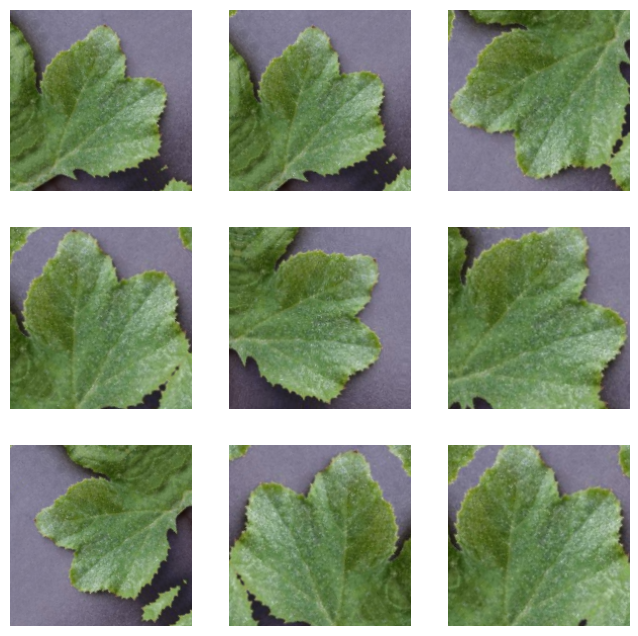

In [20]:
plt.figure(figsize=(8, 8))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.axis('off')

In [21]:
model = Sequential(
    [
        data_augmentation,
        layers.Rescaling(scale=1./255, input_shape=(img_h, img_w, 3)),
        layers.Conv2D(16, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Dropout(.2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(total_classes, activation='softmax')
    ]
)

In [22]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [25]:
epochs = 15

model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/15


1188/1188 [==============================] - 405s 259ms/step - loss: 1.5943 - accuracy: 0.5494 - val_loss: 1.2996 - val_accuracy: 0.6291
Epoch 2/15
1188/1188 [==============================] - 268s 226ms/step - loss: 0.7674 - accuracy: 0.7641 - val_loss: 0.8445 - val_accuracy: 0.7509
Epoch 3/15
1188/1188 [==============================] - 263s 222ms/step - loss: 0.5756 - accuracy: 0.8203 - val_loss: 0.4950 - val_accuracy: 0.8416
Epoch 4/15
1188/1188 [==============================] - 261s 220ms/step - loss: 0.4623 - accuracy: 0.8547 - val_loss: 0.5609 - val_accuracy: 0.8255
Epoch 5/15
1188/1188 [==============================] - 285s 240ms/step - loss: 0.3864 - accuracy: 0.8752 - val_loss: 0.4667 - val_accuracy: 0.8546
Epoch 6/15
1188/1188 [==============================] - 259s 218ms/step - loss: 0.3422 - accuracy: 0.8914 - val_loss: 0.4542 - val_accuracy: 0.8599
Epoch 7/15
1188/1188 [==============================] - 257s 217ms/step - loss: 0.3103 - accuracy: 0.8995 - va

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

range_epochs = range(epochs)

plt.figure(figsize=(9, 9))
plt.subplot(1, 2, 1)
plt.plot(range_epochs, acc, label='Training Accuracy')
plt.plot(range_epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range_epochs, loss, label='Training loss')
plt.plot(range_epochs, val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history' is not defined